In [8]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui (mac not supported)

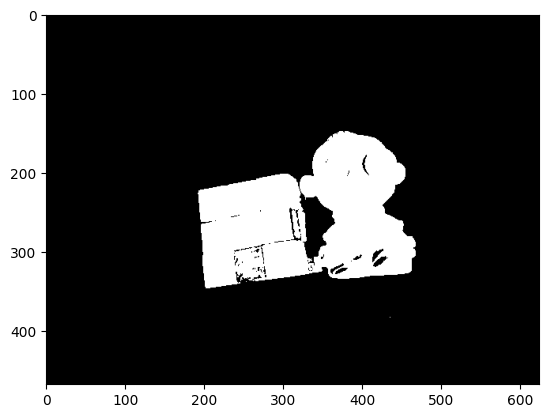

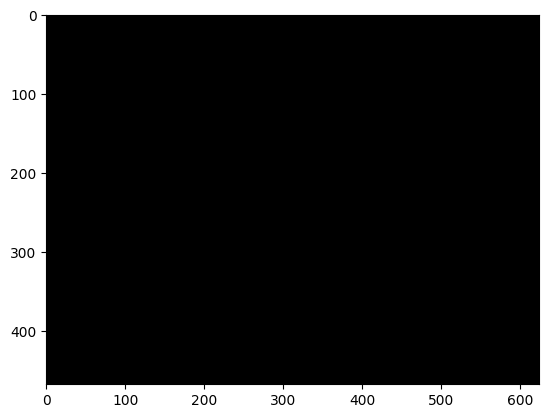

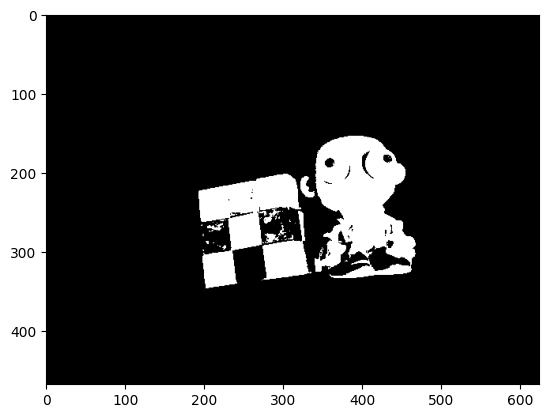

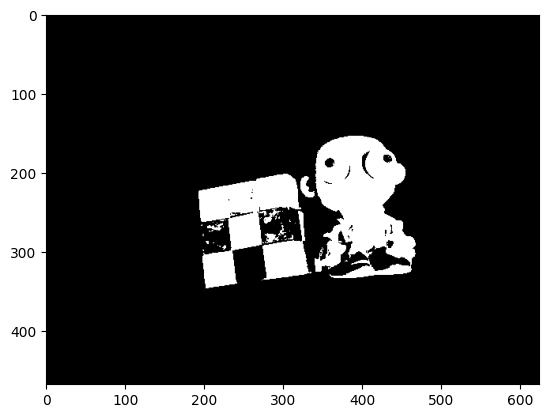

In [9]:
I = cv2.imread("../Images/Googly.jpg")

# Use threshholding to seperate Googly from the background
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Use a threshold to seperate the background from the foreground
ret,thresh1 = cv2.threshold(G, np.mean(G)+np.std(G), 255, cv2.THRESH_BINARY)

#  thresh = np.mean(G) + np.std(G) 

plt.imshow(thresh1, cmap='gray')


# Mutiple Thresholds

RangeLower = (0, 150, 150)
RangeUpper = (50, 255, 255)

for i in range(3):
    ret,thresh1 = cv2.threshold(G, RangeLower[i], RangeUpper[i], cv2.THRESH_BINARY)
    plt.figure()
    plt.imshow(thresh1, cmap='gray')
    

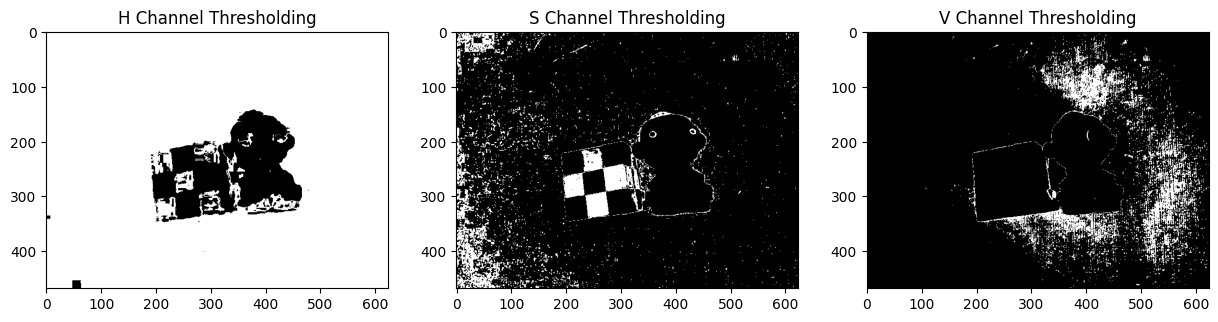

In [10]:
img = cv2.imread('../Images/Googly.jpg')

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_h = 20
upper_h = 40

lower_s = 100
upper_s = 150

lower_v = 50
upper_v = 80

# Apply thresholding to each channel
h_mask = cv2.inRange(hsv[:,:,0], np.array([lower_h]), np.array([upper_h]))
s_mask = cv2.inRange(hsv[:,:,1], np.array([lower_s]), np.array([upper_s]))
v_mask = cv2.inRange(hsv[:,:,2], np.array([lower_v]), np.array([upper_v]))

# Stack the masks
masks = np.dstack((h_mask, s_mask, v_mask)).astype('uint8')

# Display all the thresholded figures using Matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h_mask, cmap='gray')
plt.title('H Channel Thresholding')

plt.subplot(1, 3, 2)
plt.imshow(s_mask, cmap='gray')
plt.title('S Channel Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(v_mask, cmap='gray')
plt.title('V Channel Thresholding')

plt.show()

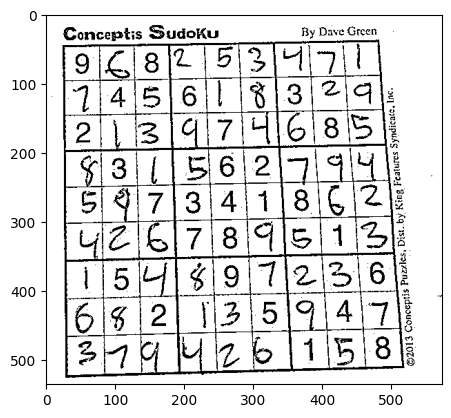

In [11]:
I = cv2.imread("../Images/sudoku.jpg")

G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Adaptive Thresholding
thresh = cv2.adaptiveThreshold(G, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 11)

plt.imshow(thresh, cmap='gray')

Text(0.5, 1.0, 'Composite Image')

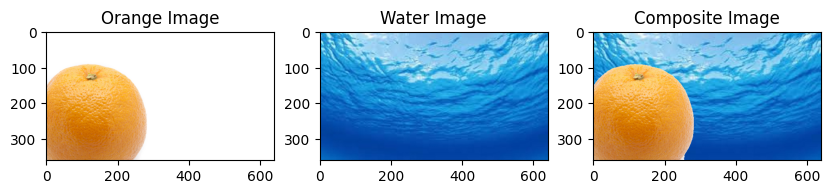

In [12]:

# Step 1: Open the Orange image
orange_img = cv2.imread('../Images/orange.png')

# Step 2: Convert the image to grayscale
gray_orange = cv2.cvtColor(orange_img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply thresholding to create a mask with the orange as the ROI (assumes white background)
ret, orange_mask = cv2.threshold(gray_orange, 240, 255, cv2.THRESH_BINARY_INV)

# Step 3: Use the mask to extract the orange from the original image
orange_extracted = cv2.bitwise_and(orange_img, orange_img, mask=orange_mask)

# Step 4: Open the Water image
water_img = cv2.imread('../Images/water.jpg')

# Step 5: Invert the orange mask to create the hole for the orange in the water image
orange_mask_inv = cv2.bitwise_not(orange_mask)
water_with_hole = cv2.bitwise_and(water_img, water_img, mask=orange_mask_inv)

# Step 6: Combine the orange and water masked images
composite_image = cv2.bitwise_or(orange_extracted, water_with_hole)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(cv2.cvtColor(orange_img, cv2.COLOR_BGR2RGB))
plt.title('Orange Image')
plt.subplot(132)
plt.imshow(cv2.cvtColor(water_img, cv2.COLOR_BGR2RGB))
plt.title('Water Image')
plt.subplot(133)
plt.imshow(cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB))
plt.title('Composite Image')




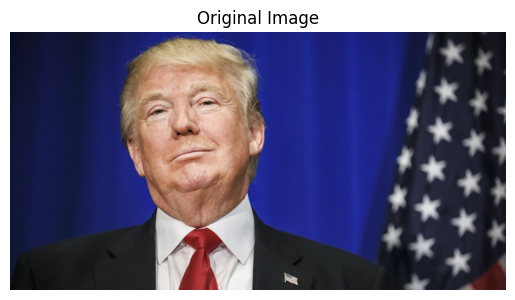

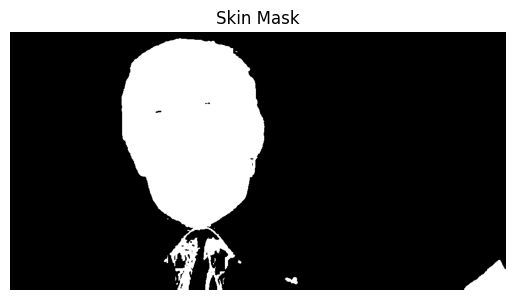

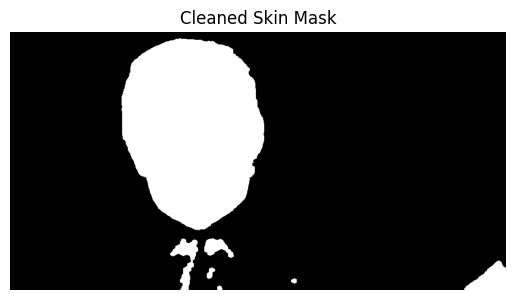

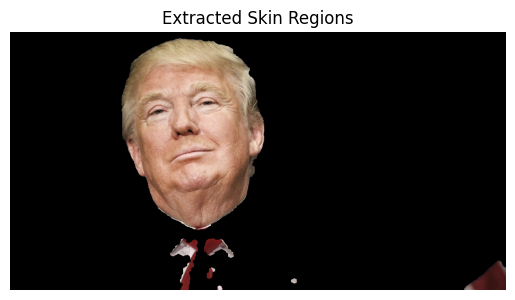

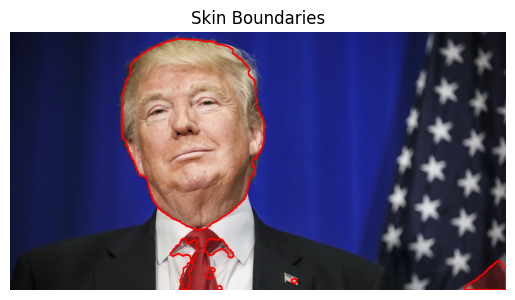

In [13]:
# Step 1: Load the image
image = cv2.imread('../Images/Trump.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Convert to YCrCb and create skin mask
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)
skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)
plt.imshow(skin_mask, cmap='gray')
plt.title('Skin Mask')
plt.axis('off')
plt.show()

# Step 3: Morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_clean = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(mask_clean, cmap='gray')
plt.title('Cleaned Skin Mask')
plt.axis('off')
plt.show()

# Step 4: Extract skin regions
skin = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_clean)
plt.imshow(skin)
plt.title('Extracted Skin Regions')
plt.axis('off')
plt.show()

# Optional: Boundary extraction
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (255, 0, 0), 2)
plt.imshow(image_with_contours)
plt.title('Skin Boundaries')
plt.axis('off')
plt.show()

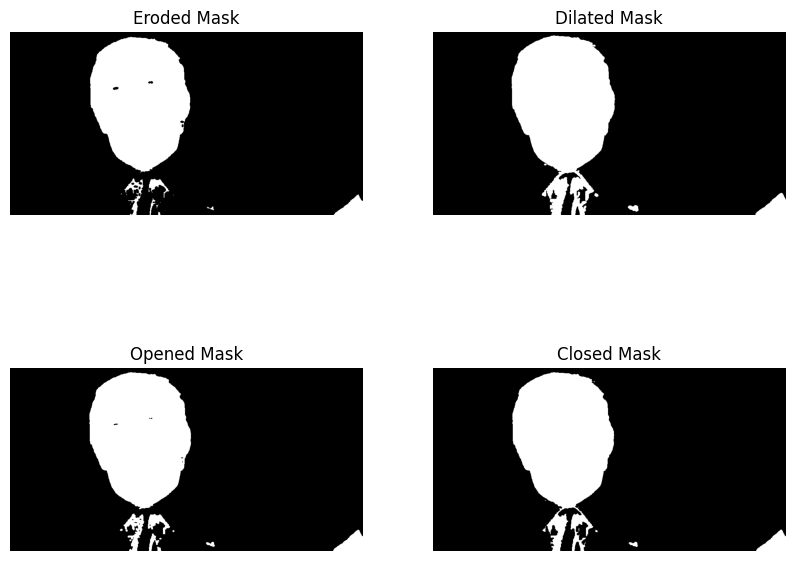

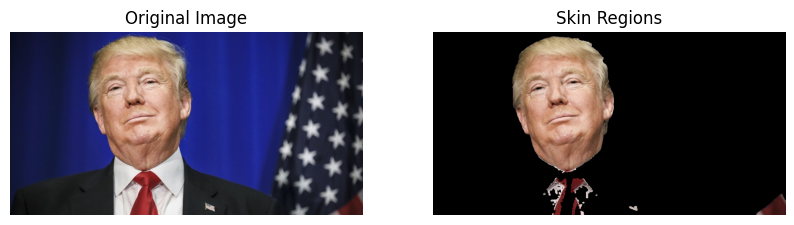

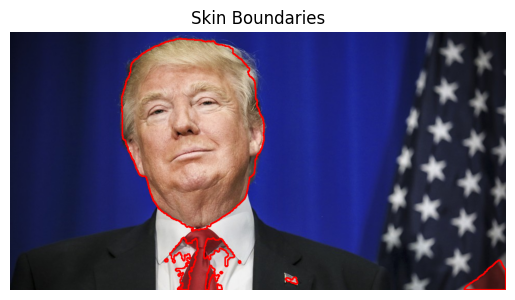

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('../Images/Trump.jpg')

# Convert to YCrCb and create a mask for skin detection
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)
skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

# Define a kernel for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Erosion
eroded = cv2.erode(skin_mask, kernel, iterations=1)

# Dilation
dilated = cv2.dilate(skin_mask, kernel, iterations=1)

# Opening (Erosion followed by Dilation)
opened = cv2.dilate(cv2.erode(skin_mask, kernel, iterations=1), kernel, iterations=1)

# Closing (Dilation followed by Erosion)
closed = cv2.erode(cv2.dilate(skin_mask, kernel, iterations=1), kernel, iterations=1)

# Display the results
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Mask')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Mask')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(opened, cmap='gray')
plt.title('Opened Mask')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(closed, cmap='gray')
plt.title('Closed Mask')
plt.axis('off')

plt.show()

#  Combine the opened and closed masks
combined = cv2.bitwise_and(opened, closed)

# Extract the skin regions
skin = cv2.bitwise_and(image, image, mask=combined)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.title('Skin Regions')
plt.axis('off')
plt.show()



# Boundary extraction
contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (255, 0, 0), 2)
plt.imshow(image_with_contours)
plt.title('Skin Boundaries')
plt.axis('off')
plt.show()